#Actividad 3 Módulo 7

#Caso

El conjunto de datos Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, con imágenes en escala de grises de 28x28 de 70 000 productos de moda de 10 categorías y 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60.000 imágenes y el conjunto de prueba tiene 10.000 imágenes. ¡Puede verificar esto más tarde cuando haya cargado sus datos! ;)

Cargar los datos

Keras viene con una biblioteca llamada datasets, que puede usar para cargar
conjuntos de datos listos para usar: descarga los datos del servidor y acelera
el proceso, ya que ya no tiene que descargar los datos a su computadora. Las
imágenes del tren y de la prueba, junto con las etiquetas, se cargan y
almacenan en las variables train_X, train_Y, test_X, test_Y, respectivamente.

pip install --upgrade tensorflow

from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

import numpy as np

from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Realice lo siguiente:

1. Obtenga el tamaño de los datos de test y testeo, además de las
dimensiones de las imágenes.
2. Obtenga las categorías de la base
3. Visualice sus datos.
4. Convierta cada imagen de 28 x 28 del tren y del equipo de prueba en una matriz de tamaño 28 x 28 x 1 que se alimenta a la red. Además, debe convertir su tipo a float32, y también debe volver a escalar los valores de píxel en el rango 0 - 1 inclusive.
5. Convierta las etiquetas de entrenamiento y prueba en vectores de
codificación one-hot.
6. Separar datos de entrenamiento y testeo
7. Para modelar sus datos, utilice los siguientes paquetes:
import keras

from keras.models import Sequential,Input,Model

from keras.layers import Dense, Dropout, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.layers.normalization import BatchNormalization

from keras.layers.advanced_activations import LeakyReLU

Usará un tamaño de lote de 64 y también es preferible usar un tamaño
de lote más alto de 128 o 256, todo depende de la memoria. Contribuye enormemente a determinar los parámetros de aprendizaje y afecta la precisión de la predicción. Entrenarás la red durante 20 épocas.

batch_size = 64

epochs = 20

num_classes = 10

8. Agregue la capa de agrupación máxima con MaxPooling2D() y así
sucesivamente.
9. Compilación y visualización del modelo

In [32]:
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import fashion_mnist
from sklearn.datasets import load_digits
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [33]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
len(test_images)

10000

In [35]:
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
'Sandalia', 'Camisa', 'Zapatilla deportiva', 'Bolso', 'Botines']

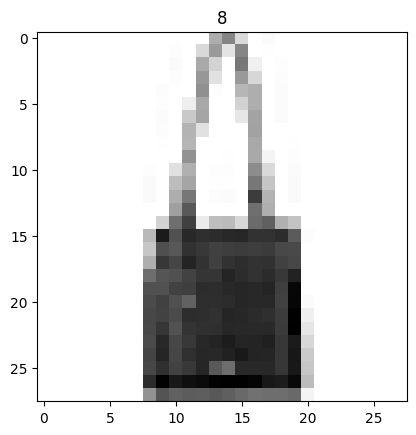

In [36]:
plt.figure()
plt.imshow(train_images[200], cmap = 'gray_r') 
plt.title(train_labels[200])
#plt.colorbar()
plt.grid(False)
plt.show()

In [37]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [38]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [39]:
# Convert labels to one-hot vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [40]:
# Segundo modelo (Joao)
model = Sequential()

In [41]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [42]:
model.add(MaxPooling2D((2, 2)))

In [43]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [44]:
model.add(MaxPooling2D((2, 2)))

In [45]:
model.add(Flatten())

In [46]:
model.add(Dense(64, activation='relu'))

In [47]:
model.add(Dense(10, activation='softmax'))

In [48]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [50]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), batch_size=64)

Epoch 1/20
938/938 [==============================] - 8s 7ms/step - loss: 0.4977 - accuracy: 0.8202 - val_loss: 0.3816 - val_accuracy: 0.8644
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.3336 - accuracy: 0.8798 - val_loss: 0.3270 - val_accuracy: 0.8808
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2871 - accuracy: 0.8951 - val_loss: 0.2946 - val_accuracy: 0.8933
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2557 - accuracy: 0.9071 - val_loss: 0.2989 - val_accuracy: 0.8868
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2328 - accuracy: 0.9148 - val_loss: 0.2736 - val_accuracy: 0.9022
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2153 - accuracy: 0.9212 - val_loss: 0.2526 - val_accuracy: 0.9096
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1950 - accuracy: 0.9281 - val_loss: 0.2563 - val_accuracy: 0.9084
Epoch 

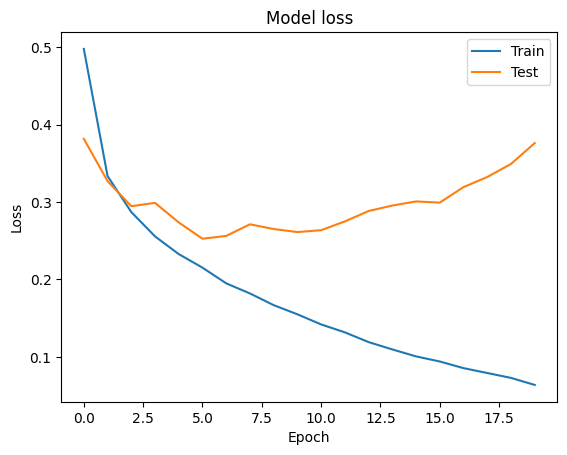

In [51]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Test')
ax.set_title('Model loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

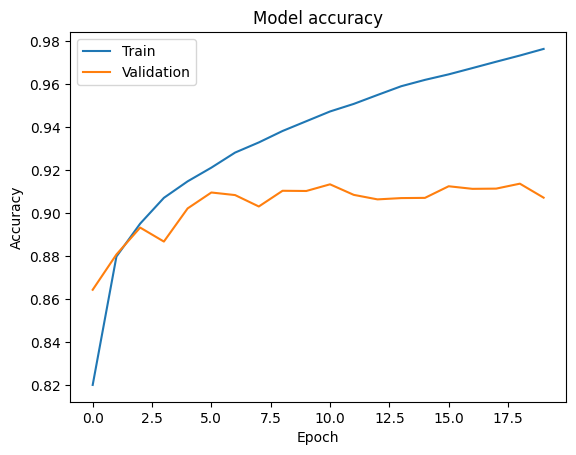

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

313/313 [==============================] - 1s 2ms/step


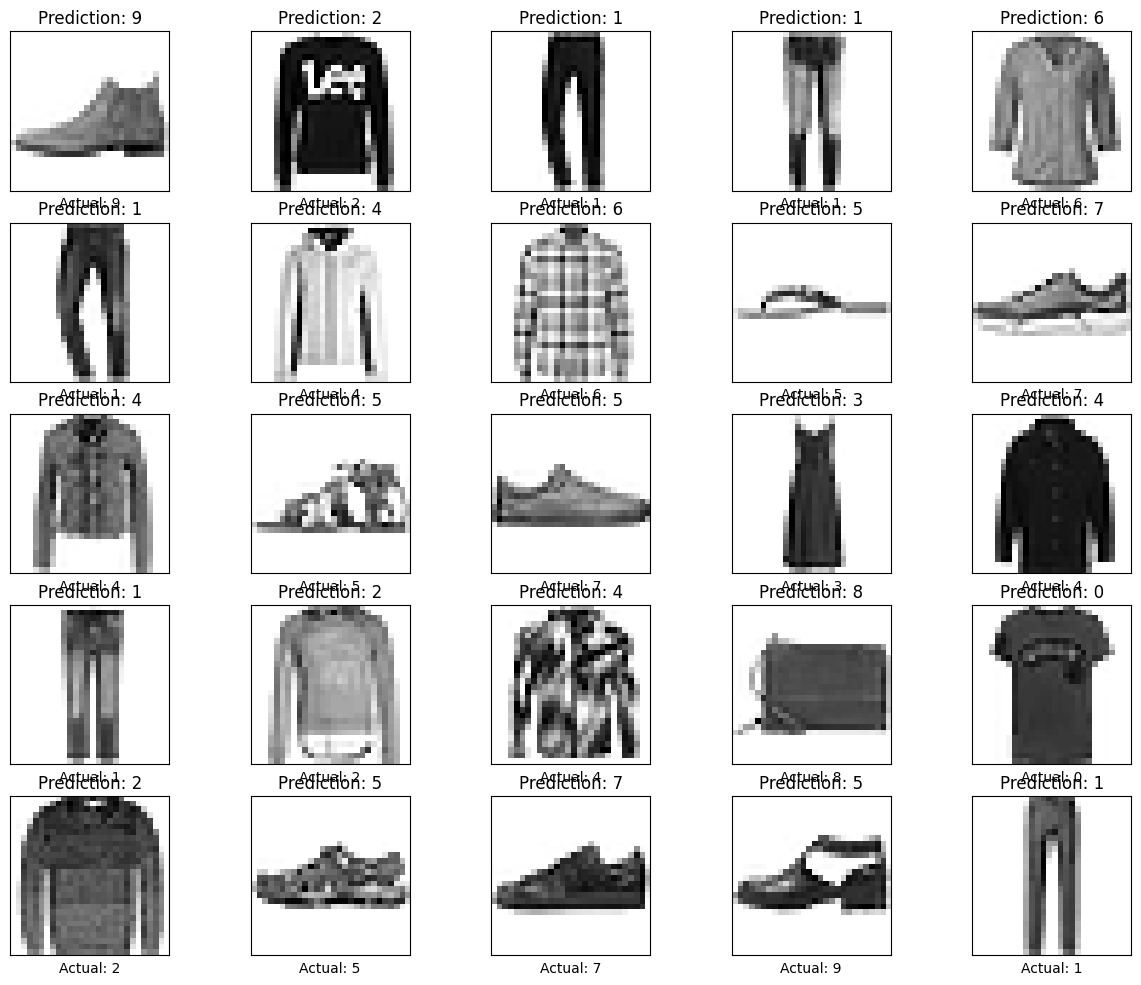

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Hacer algunas predicciones
predictions = model.predict(test_images)

# Dibujar algunas de las predicciones y sus etiquetas verdaderas
plt.figure(figsize=(15,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {np.argmax(test_labels[i])}')
    plt.title(f'Prediction: {np.argmax(predictions[i])}')
plt.show()

In [54]:
print(train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


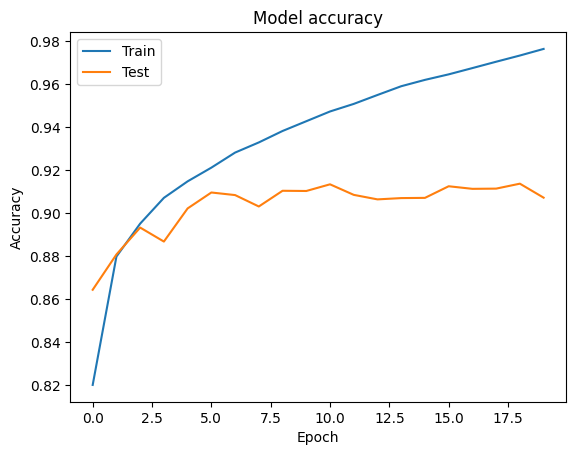

In [55]:
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='Train')
ax.plot(history.history['val_accuracy'], label='Test')
ax.set_title('Model accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

Epoch 1/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0985 - val_accuracy: 0.9643
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0994 - val_accuracy: 0.9636
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0283 - accuracy: 0.9900 - val_loss: 0.1327 - val_accuracy: 0.9553
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0255 - accuracy: 0.9909 - val_loss: 0.1375 - val_accuracy: 0.9551
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.1564 - val_accuracy: 0.9503
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0309 - accuracy: 0.9886 - val_loss: 0.1789 - val_accuracy: 0.9463
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0263 - accuracy: 0.9910 - val_loss: 0.1579 - val_accuracy: 0.9521
Epoch 

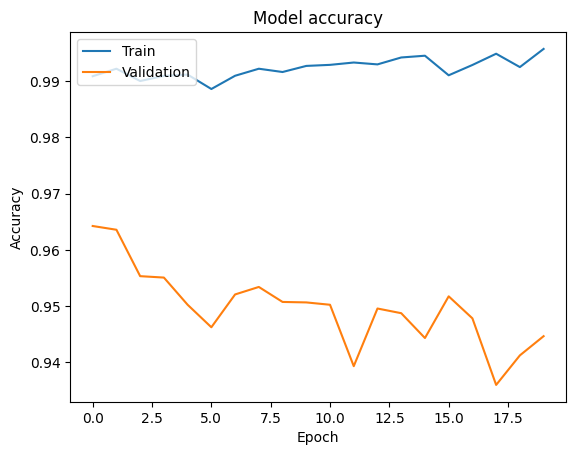

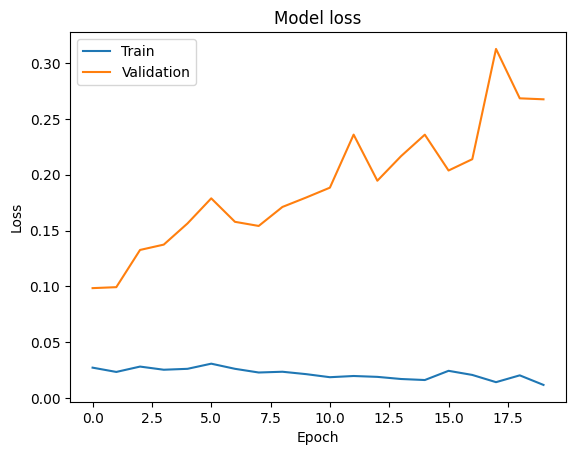

In [57]:
import matplotlib.pyplot as plt

# Ajuste del modelo con historial
history = model.fit(train_images, train_labels, batch_size=64, epochs=20, validation_split=0.2)

# Gráfico de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#Preguntas guía

- Qué es Keras

Keras es una biblioteca de código abierto (con licencia MIT) escrita en Python, que se basa principalmente en el trabajo de François Chollet, un desarrollador de Google, en el marco del proyecto ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System). 

La primera versión de este software multiplataforma se lanzó el 28 de marzo de 2015. El objetivo de la biblioteca es acelerar la creación de redes neuronales: para ello, Keras no funciona como un framework independiente, sino como una interfaz de uso intuitivo (API) que permite acceder a varios frameworks de aprendizaje automático y desarrollarlos. Entre los frameworks compatibles con Keras, se incluyen Theano, Microsoft Cognitive Toolkit (anteriormente CNTK) y TensorFlow.

- Redes neuronales convolucionales (CNN)

La CNN es un tipo de Red Neuronal Artificial con aprendizaje supervisado que procesa sus capas imitando al cortex visual del ojo humano para identificar distintas características en las entradas que en definitiva hacen que pueda identificar objetos y “ver”. Para ello, la CNN contiene varias capas ocultas especializadas y con una jerarquía: esto quiere decir que las primeras capas pueden detectar lineas, curvas y se van especializando hasta llegar a capas más profundas que reconocen formas complejas como un rostro o la silueta de un animal.

- Capas, componente de la arquitectura básica de las redes neuronales y que se pueden ejemplificar de la siguiente manera:

-Datos de entrada en la Capa Inicial
- Red “tradicional” Feedforward multicapa: Las características que analizamos. Por ejemplo: ancho, alto, grosor, etc.
- Red Neuronal Convolucional CNN: Pixeles de una imagen. Si es color, serán 3 capas para rojo,verde,azul

-Capas ocultas
- Red “tradicional” Feedforward multicapa: elegimos una cantidad de neuronas para las capas ocultas.
- Red Neuronal Convolucional CNN: Tenemos de tipo:
* Convolución (con un tamaño de kernel y una cantidad de filtros)
* Subsampling

-Capa de Salida
- Red “tradicional” Feedforward multicapa: La cantidad de neuronas que queremos clasificar. Para “comprar” ó “alquilar” serán 2 neuronas.
- Red Neuronal Convolucional CNN: Debemos “aplanar” la última convolución con una (ó más) capas de neuronas ocultas “tradicionales” y hacer una salida mediante SoftMax a la capa de salida que clasifica “perro” y “gato” serán 2 neuronas.

Resumiendo: podemos decir que los elementos que usamos para crear CNNs son:

- Capa de Entrada: Serán los pixeles de la imagen. Serán alto, ancho y profundidad será 1 sólo color o 3 para Red,Green,Blue.

- Capa De Convolución: procesará la salida de neuronas que están conectadas en “regiones locales” de entrada (es decir pixeles cercanos), calculando el producto escalar entre sus pesos (valor de pixel) y una pequeña región a la que están conectados en el volumen de entrada. Aquí usaremos por ejemplo 32 filtros o la cantidad que decidamos y ese será el volumen de salida.

- “CAPA RELU” aplicará la función de activación en los elementos de la matriz.

- POOL ó SUBSAMPLING: Hará una reducción en las dimensiones alto y ancho, pero se mantiene la profundidad.

- CAPA “TRADICIONAL” red de neuronas feedforward que conectará con la última capa de subsampling y finalizará con la cantidad de neuronas que queremos clasificar.